In [38]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv(r'C:\Users\nadee\ML Internship Project\CREDIT CARD FRAUD Data Set\fraudTest.csv')

In [40]:
print(df.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [42]:
print(df.describe())

          Unnamed: 0        cc_num            amt            zip  \
count  555719.000000  5.557190e+05  555719.000000  555719.000000   
mean   277859.000000  4.178387e+17      69.392810   48842.628015   
std    160422.401459  1.309837e+18     156.745941   26855.283328   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%    138929.500000  1.800429e+14       9.630000   26292.000000   
50%    277859.000000  3.521417e+15      47.290000   48174.000000   
75%    416788.500000  4.635331e+15      83.010000   72011.000000   
max    555718.000000  4.992346e+18   22768.110000   99921.000000   

                 lat           long      city_pop     unix_time  \
count  555719.000000  555719.000000  5.557190e+05  5.557190e+05   
mean       38.543253     -90.231325  8.822189e+04  1.380679e+09   
std         5.061336      13.721780  3.003909e+05  5.201104e+06   
min        20.027100    -165.672300  2.300000e+01  1.371817e+09   
25%        34.668900     -96.798000  7.410000e+02  1

In [43]:
print(df.isnull().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Unnamed: 0  trans_date_trans_time  cc_num  merchant  category    amt  \
0            False                  False   False     False     False  False   
1            False                  False   False     False     False  False   
2            False                  False   False     False     False  False   
3            False                  False   False     False     False  False   
4            False                  False   False     False     False  False   
...            ...                    ...     ...       ...       ...    ...   
555714       False                  False   False     False     False  False   
555715       False                  False   False     False     False  False   
555716       False                  False   False     False     False  False   
555717       False                  False   False     False     False  False   
555718       False                  False   False     Fals

In [44]:
print(df.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [45]:
# Feature scaling for 'amt'
scaler = StandardScaler()
df['scaled_amt'] = scaler.fit_transform(df['amt'].values.reshape(-1, 1))

In [46]:
# Drop columns that are not useful for modeling or need to be scaled separately
df.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 
         'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num', 
         'unix_time', 'amt'], axis=1, inplace=True)

In [47]:
# Define features (X) and target (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

In [48]:
# Define categorical and numerical features
categorical_features = ['merchant', 'category', 'gender']  # Exclude 'state' since it's not present
numeric_features = ['scaled_amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']


In [49]:
# One-Hot Encoding for categorical variables
categorical_features = ['merchant', 'category', 'gender', 'state']
numeric_features = ['scaled_amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

In [50]:
# ColumnTransformer to apply transformations to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

In [51]:
# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

In [52]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [53]:
# Print the column names to see what's available in X_train
print("Columns in X_train:", X_train.columns)

Columns in X_train: Index(['merchant', 'category', 'gender', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long', 'scaled_amt'],
      dtype='object')


In [54]:
# Define features (X) and target (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

In [56]:
# List your categorical and numerical features
categorical_features = ['merchant', 'category', 'gender'] 

In [57]:
# Removed 'state' as it's not in your DataFrame
numeric_features = ['scaled_amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

In [58]:
# ColumnTransformer to apply transformations to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

In [59]:
# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])


In [60]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [61]:
# Verify the columns again in X_train
print("Columns in X_train after split:", X_train.columns)

Columns in X_train after split: Index(['merchant', 'category', 'gender', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long', 'scaled_amt'],
      dtype='object')


In [62]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

C:\Users\nadee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['scaled_amt', 'lat', 'long',
                                                   'city_pop', 'merch_lat',
                                                   'merch_long']),
                                                 ('cat', OneHotEncoder(),
                                                  ['merchant', 'category',
                                                   'gender'])])),
                ('classifier', LogisticRegression())])

In [63]:
# Predict on the test data
y_pred = pipeline.predict(X_test)

In [65]:
# Evaluate the model
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression:
[[110692     23]
 [   429      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.00      0.00      0.00       429

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



In [68]:
# Train and predict with Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', dt)])

In [77]:
dt_pipeline.fit(X_train, y_train)
dt_pred = dt_pipeline.predict(X_test)

In [82]:
# Train and predict with Random Forest
rf = RandomForestClassifier(random_state=42)
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', rf)])
rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)

In [83]:
# Evaluate Models
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression:
[[110692     23]
 [   429      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.00      0.00      0.00       429

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



In [84]:
print("Decision Tree:")
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

Decision Tree:
[[110535    180]
 [   162    267]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.60      0.62      0.61       429

    accuracy                           1.00    111144
   macro avg       0.80      0.81      0.80    111144
weighted avg       1.00      1.00      1.00    111144



In [85]:
print("Random Forest:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest:
[[110696     19]
 [   276    153]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.89      0.36      0.51       429

    accuracy                           1.00    111144
   macro avg       0.94      0.68      0.75    111144
weighted avg       1.00      1.00      1.00    111144



In [87]:
# Extract feature names from the ColumnTransformer
numeric_feature_names = numeric_features  # These are already in the correct order
categorical_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)

In [88]:
# Concatenate feature names
feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])


In [89]:
# Plotting Feature Importance for Random Forest
feature_importance = rf.feature_importances_

In [90]:
# Creating a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

In [91]:
# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)


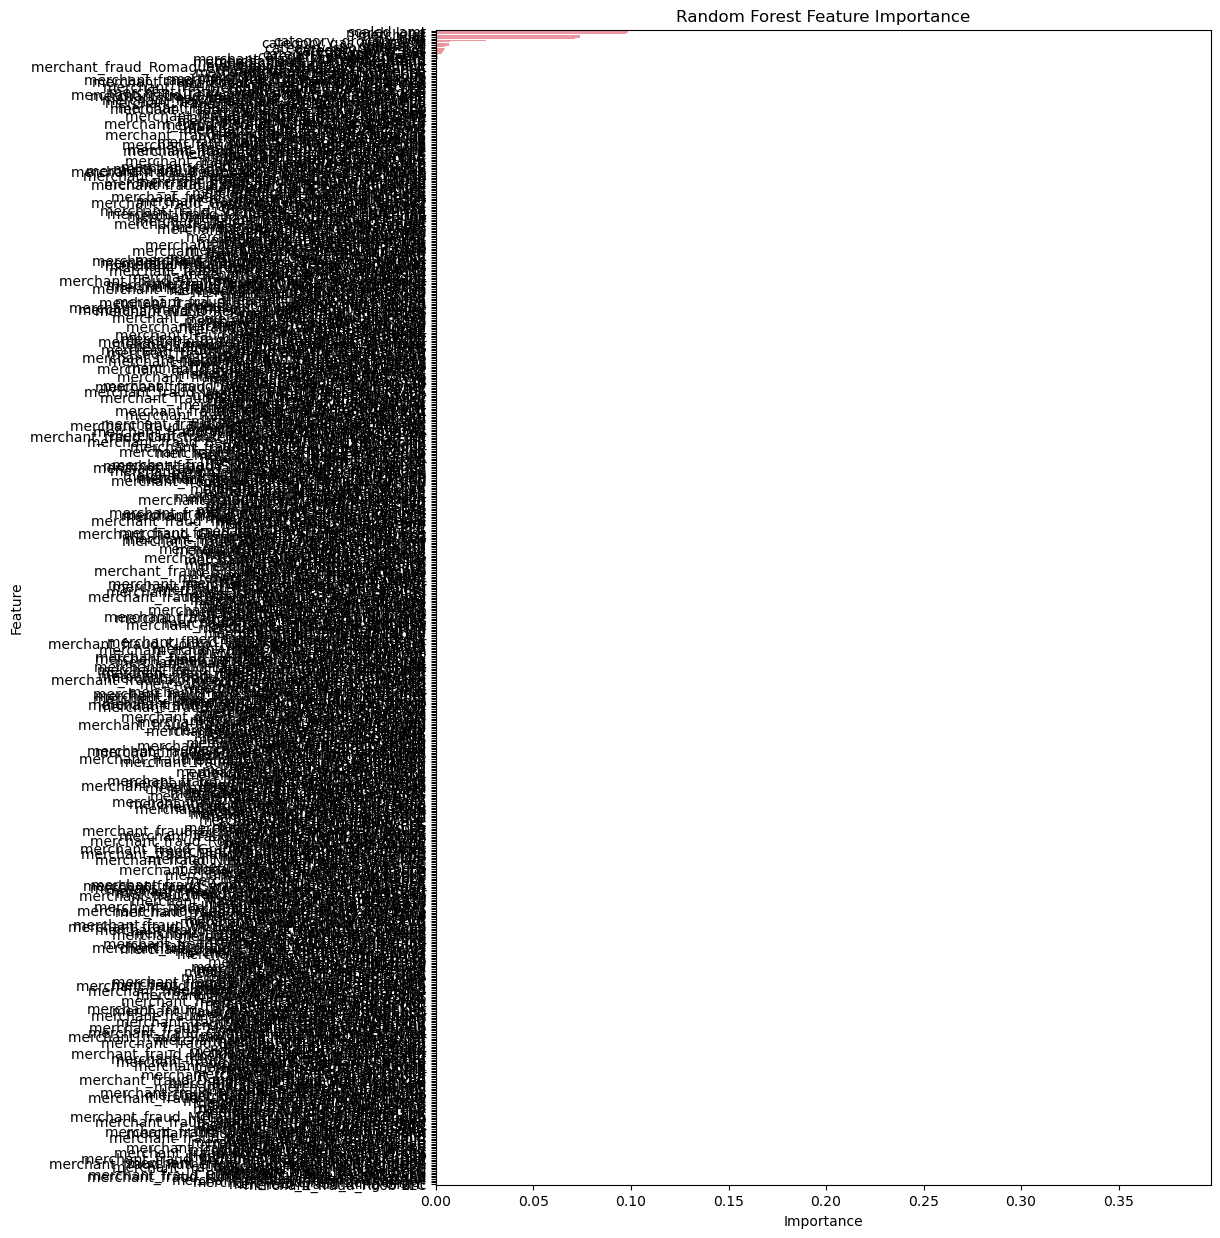

In [100]:
# Plotting
plt.figure(figsize=(10,15))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

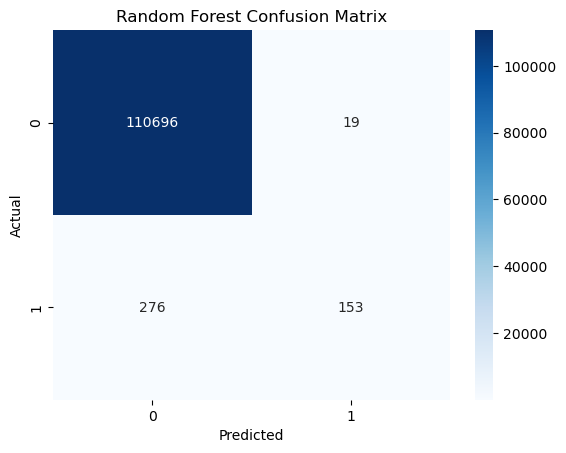

In [101]:
# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, rf_pred)

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()